In [ ]:
import numpy as np
import pandas as pd
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('feedback-nlp.csv')
df.head(1)

,Computer Networks (Feedback),Computer Networks (Satisfaction),Machine Learning (Feedback),Machine Learning (Satisfaction),Operating System (Feedback),Operating System (Satisfaction),Computer Organization & Architecture (Feedback),Computer Organization & Architecture (Satisfaction)
0,"The sessions were fine, but there was a lack o...",Neutral,It was an average experience overall; the facu...,Neutral,The faculty did not engage the class effective...,Negative,"The teaching style was acceptable, but the cou...",Neutral


In [ ]:
df_CN = df[['Computer Networks (Feedback)', 'Computer Networks (Satisfaction)']]
df_CN.head()

,Computer Networks (Feedback),Computer Networks (Satisfaction)
0,"The sessions were fine, but there was a lack o...",Neutral
1,The course was very well-structured and the fa...,Positive
2,The faculty did not engage the class effective...,Negative
3,The faculty did not engage the class effective...,Negative
4,The course was decent but could use more examp...,Neutral


In [ ]:
df_CN['Computer Networks (Satisfaction)'].value_counts()

,count
Computer Networks (Satisfaction),
Neutral,714
Negative,647
Positive,639


In [ ]:
CN_X = df_CN['Computer Networks (Feedback)']
CN_y = df_CN['Computer Networks (Satisfaction)']

In [ ]:
CN_X.head()

,Computer Networks (Feedback)
0,"The sessions were fine, but there was a lack o..."
1,The course was very well-structured and the fa...
2,The faculty did not engage the class effective...
3,The faculty did not engage the class effective...
4,The course was decent but could use more examp...


In [ ]:
t = time()
tf_vectorizer = CountVectorizer()
CN_X = tf_vectorizer.fit_transform(CN_X)
duration = time() - t
print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % CN_X.shape)

Time taken to extract features from training data : 0.057745 seconds
n_samples: 2000, n_features: 148


In [ ]:
print(CN_X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


## Neural Network Implementation

In [ ]:
X = CN_X.toarray()
y = CN_y.values

In [ ]:
X[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
y

array(['Neutral', 'Positive', 'Negative', ..., 'Neutral', 'Negative',
       'Positive'], dtype=object)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Encoding 'Computer Networks (Satisfaction)'
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(sparse_output=False), [0])], remainder = 'passthrough')
y = np.array(ct.fit_transform(y.reshape(-1,1)))

In [ ]:
y

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
#%60 for train, %28 for val, %12 for test
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X, y, random_state=42, test_size= 0.4)
#Split test and val dataset.
X_val,X_test,Y_val,Y_test = train_test_split(X_val,Y_val,random_state = 42,test_size = 0.3)
print(f"{X_train.shape}, {X_test.shape}, {X_val.shape}")

# Dimension Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_val = pca.fit_transform(X_val)
X_test = pca.transform(X_test)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_val = scaler.transform(X_val)

(1200, 148), (240, 148), (560, 148)


In [ ]:
import tensorflow as tf
from keras.layers import Dense, Dropout
from keras.models import Sequential
def build_model():
    model = Sequential()
    #Input layer
    model.add(Dense(32, activation = "relu", kernel_initializer = "he_normal",input_dim = len(X_train[0])))
    #Hidden layer 1
    model.add(Dense(64, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 2
    model.add(Dense(128, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 3
    model.add(Dense(64, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Hidden layer 4
    model.add(Dense(64, activation = "relu", kernel_initializer = "he_normal"))
    model.add(Dropout(0.3))
    #Output layer
    model.add(Dense(3, activation = "softmax", kernel_initializer = "he_normal"))
    return model

In [ ]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_101 (Dense)                    │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_102 (Dense)                    │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_69 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_103 (Dense)                    │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_70 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_104 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_71 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_72 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,171 (90.51 KB)

 Trainable params: 23,171 (90.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# !pip install scikeras

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
             loss = "categorical_crossentropy",metrics = ["accuracy"])

history = model.fit(X_train, Y_train, batch_size = 32, epochs = 100,
                         validation_data=(X_val,Y_val), callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=5))

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.3461 - loss: 2.6162 - val_accuracy: 0.2750 - val_loss: 1.6397
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3574 - loss: 2.2120 - val_accuracy: 0.4286 - val_loss: 1.2891
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4167 - loss: 1.6042 - val_accuracy: 0.4286 - val_loss: 1.1481
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4521 - loss: 1.4242 - val_accuracy: 0.4286 - val_loss: 1.0804
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5025 - loss: 1.2491 - val_accuracy: 0.4286 - val_loss: 1.0372
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4787 - loss: 1.2563 - val_accuracy: 0.4286 - val_loss: 1.0024
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5072 - loss: 1.1296 - val_accuracy: 0.4964 - val_loss: 0.9796
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4988 - loss: 1.1381 - val_accuracy: 0.4964 - 

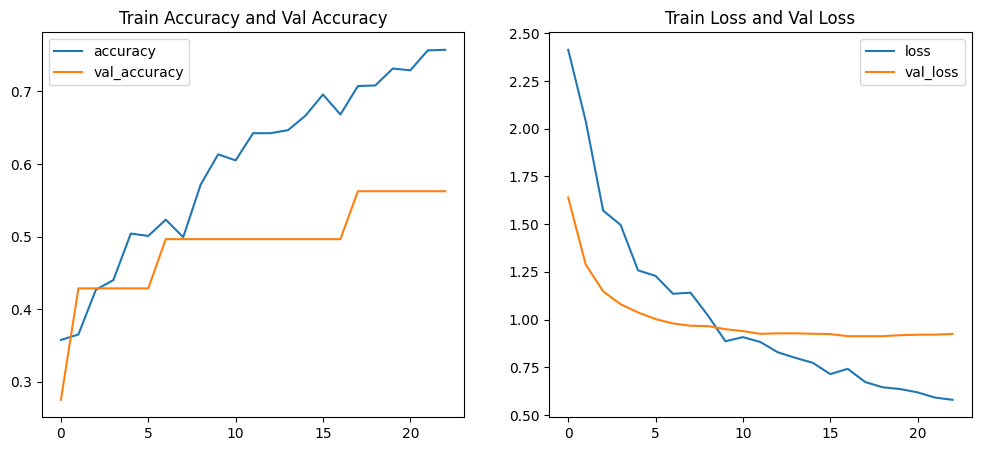

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,5))

epochs = len(history.history["accuracy"])
plt.subplot(1,2,1)
plt.title("Train Accuracy and Val Accuracy")
plt.plot(range(epochs),history.history["accuracy"])
plt.plot(range(epochs),history.history["val_accuracy"])
plt.legend(["accuracy","val_accuracy"])

plt.subplot(1,2,2)
plt.title("Train Loss and Val Loss")
plt.plot(range(epochs),history.history["loss"])
plt.plot(range(epochs),history.history["val_loss"])
plt.legend(["loss","val_loss"])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, average_precision_score

# Step 1: Evaluate the model on the test dataset
X_test_reshaped = X_test.reshape(-1, X_test.shape[1])
loss, accuracy = model.evaluate(X_test_reshaped, Y_test, verbose=0)

print(f"Model Loss: {loss:.4f}")
print(f"Model Accuracy: {accuracy:.4f}")

# Step 2: Generate predictions
Y_pred = model.predict(X_test_reshaped)
Y_pred_classes = Y_pred.argmax(axis=1)
Y_test_classes = Y_test.argmax(axis=1)

# Step 3: Generate a detailed classification report
print('\n------------------------------------------------\n')
report = classification_report(Y_test_classes, Y_pred_classes, target_names=['Class 0', 'Class 1', 'Class 2'])
print("\nClassification Report:\n", report)

Model Loss: 0.9623
Model Accuracy: 0.5583
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

------------------------------------------------


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.58      0.64      0.61        76
     Class 1       0.53      0.80      0.64        85
     Class 2       0.61      0.22      0.32        79

    accuracy                           0.56       240
   macro avg       0.57      0.55      0.52       240
weighted avg       0.57      0.56      0.52       240

